# Getting Started

This tutorial will help you install the ESGF End-user API and demonstrate some of the capabilites using ESGF's WPS server on [aims2](https://aims2.llnl.gov).

## Step 1

Install miniconda for your OS.

* Miniconda for [MacOS](https://conda.io/docs/user-guide/install/macos.html) follow those instructions.

* Miniconda for [Linux](https://conda.io/docs/user-guide/install/linux.html) follow those instructions.

## Step 2

Install the required packages from conda.

```
conda install -c conda-forge -c cdat esgf-compute-api
```

To add the other packages we'll be using in this guide run the following:

```
conda install -c conda-forge -c cdat cdms2 vcs
```

If you're running a headless server you may need to install the mesalib version of vcs:

```
conda install -c conda-forge -c cdat mesalib cdms2 vcs
```

## Step 3

Next you'll want to create an account on [aims2](https://aims2.llnl.gov/wps/home) and retrieve an API key, giving you access
to LLNL's ESGF Compute Node. Follow the instructions on the landing page.

## Step 4

Now we'll run through some basics of using the ESGF Compute End-user API.

## Setup your connection the compute server

Replace the `host`, `api_key`, `verify` to appropiate values.

In [1]:
host = 'aims2.llnl.gov'
verify = True
api_key = 'TOKEN'

import cwt

client = cwt.WPSClient('https://{!s}/wps/'.format(host), api_key=api_key, verify=verify)
client

WPSClient(url='https://aims2.llnl.gov/wps/', log=False, log_file=None, verify=True, version=None, cert=None, headers={'COMPUTE-TOKEN': 'lh9us2QVfzJmRpKAzROZVbzfYOV4GNl4gIW4inTX9mlRInFOfysRwa9865Zujgzv'})

## List the available processes
This will print out a list of the available processes.

In [2]:
for p in client.processes():
    print(p.identifier)

CDAT.metrics
CDAT.workflow
CDAT.subset
CDAT.aggregate
CDAT.regrid
CDAT.sum
CDAT.max
CDAT.min
CDAT.subtract
CDAT.add


## Search for a specific process

This will find all processes matching the [regular expression](https://docs.python.org/2/library/re.html).

In [3]:
for p in client.processes('.*\\.subset'):
    print(p.identifier)

CDAT.subset


## Choose a process to execute
Let's choose which process we'll be executing.

In [4]:
proc = client.process_by_name('CDAT.subset')
proc

Process(identifier='CDAT.subset', title='CDAT.subset', status_supported=None, store_supported=None, process_version='devel', abstract='Subset a variable by provided domain. Supports regridding.', metadata=[{'url': None, 'title': 'inputs:1', 'role': None}])

## Configure our process with inputs and some constraints
Here we define our input variables and the domain we're interested in.

In [5]:
tas = cwt.Variable('http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_185001-190012.nc', 'tas')
d0 = cwt.Domain(lat=(-90, 0), time=(0, 2000))
d0

Domain(dimensions={'lat': Dimension(name='lat', start=-90, end=0, step=1, crs=CRS(name='values')), 'time': Dimension(name='time', start=0, end=2000, step=1, crs=CRS(name='values'))}, mask=None, name='5af51889-9fe1-439a-9cab-8dcbe61b7cdf')

## Let's execute the process
Now we'll send the request to the server and wait for the output.

In [6]:
client.execute(proc, [tas], d0)

proc.wait()

ProcessAccepted None
ProcessStarted Processing 0
ProcessSucceeded None


True

## Let's checkout the output of the process

In [7]:
proc.output

Variable(name='c7a1ff8c-1f83-459d-b154-0b24d40872f4', uri='https://aims2.llnl.gov/threddsCWT/dodsC/public/5/297/e15eb54e-42e9-4f5c-a727-6135d8c6e85c.nc', var_name='tas', domain=None, mime_type=None)

## Let's explore the output

In [8]:
import cdms2

f = cdms2.open(proc.output.uri)

data = f[proc.output.var_name]

# (66, 120, 480)
print(data.shape)

/1Tb/miniconda3/envs/nightly/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(66, 45, 144)


/1Tb/miniconda3/envs/nightly/lib/python3.6/site-packages/vcs-v8.1_2_g20f721c-py3.6.egg/vcs/__init__.py:324: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/doutriaux1/.cache/Python-Eggs/vcs-v8.1_2_g20f721c-py3.6.egg-tmp/share/vcs/initial.attributes' mode='r' encoding='UTF-8'>
/1Tb/miniconda3/envs/nightly/lib/python3.6/site-packages/vcs-v8.1_2_g20f721c-py3.6.egg/vcs/utils.py:1432: DeprecationWarning: Single-argument form of np.ma.maximum is deprecated. Use np.ma.maximum.reduce instead.
/1Tb/miniconda3/envs/nightly/lib/python3.6/site-packages/vcs-v8.1_2_g20f721c-py3.6.egg/vcs/utils.py:1454: DeprecationWarning: Single-argument form of np.ma.maximum is deprecated. Use np.ma.maximum.reduce instead.
/1Tb/miniconda3/envs/nightly/lib/python3.6/site-packages/vcs-v8.1_2_g20f721c-py3.6.egg/vcs/VTKPlots.py:1032: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/doutriaux1/.cache/Python-Eggs/vcs-v8.1_2_g20f721c-py3.6.egg-tmp/share/vcs/data_continent_fine' mode='r' encoding

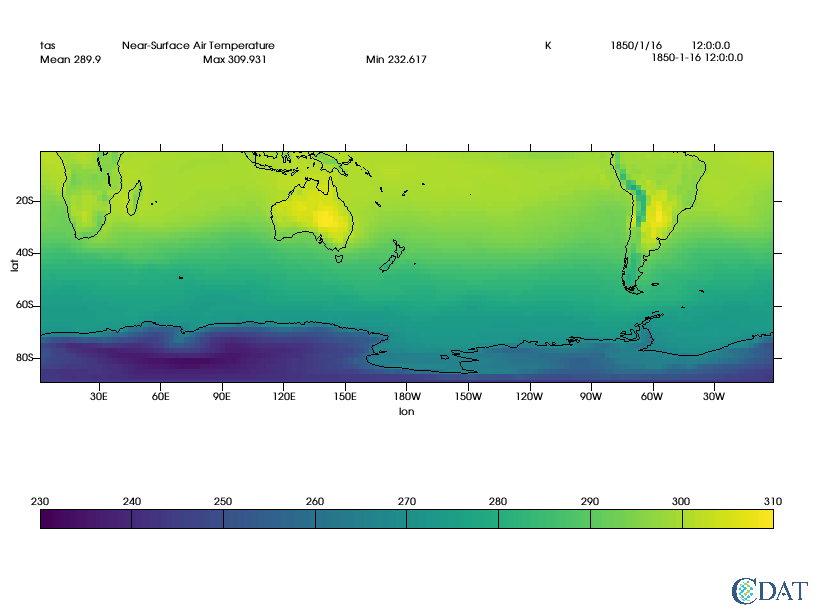

In [9]:
import vcs

v = vcs.init(bg=True)

v.plot(data, ratio="autot")